Cargando datos de: ..\data\raw\Fake.csv
Total de noticias: 44898
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None
                                                   title  \
21283  Planned Parenthood Fundraises Over Shooting…On...   
3068    Coretta Scott King Wrote A Letter Opposing Je...   
24518  U.N. rights expert assails Trump administratio...   
8284    Watch The EXACT Moment Marco Rubio Saw His Pr...   
18114  KATIE COURIC HITS NEW CAREER LOW: Asks Perfect...   

                                                    text       subject  \
21283  Obama and the Democrats can kill two birds wit...     left-news   
3068

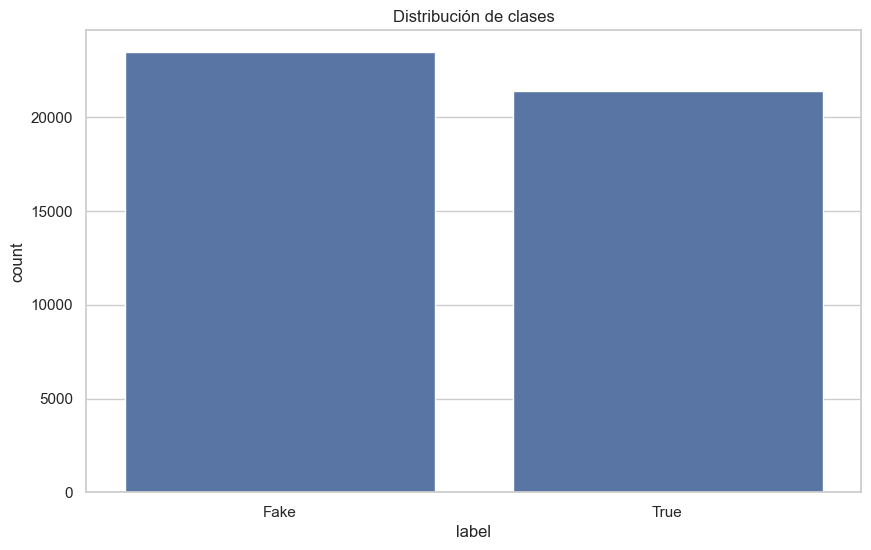

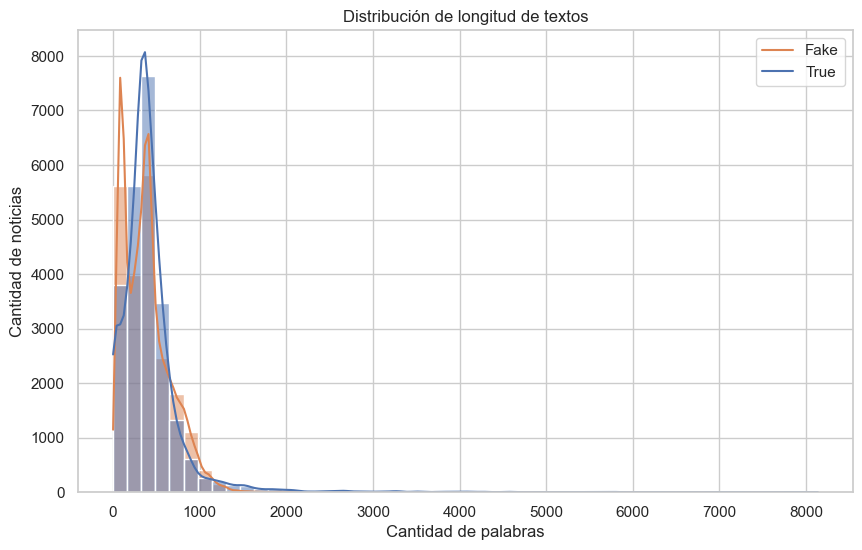


Valores nulos:
title          0
text           0
subject        0
date           0
label          0
text_length    0
dtype: int64

Duplicados: 209


In [ ]:
# 01_exploracion.ipynb

# 🔹 1. Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# 🔹 2. Carga de datos
fake_path = os.path.join("..", "data", "raw", "Fake.csv")
true_path = os.path.join("..", "data", "raw", "True.csv")

df_fake = pd.read_csv(fake_path)
df_true = pd.read_csv(true_path)

# Añadir etiquetas
df_fake["label"] = 0  # Falsa
df_true["label"] = 1  # Verdadera

# Combinar datasets
df_all = pd.concat([df_fake, df_true], ignore_index=True)
print(f"Total de noticias: {len(df_all)}")

# 🔹 3. Información general
print(df_all.info())
print(df_all.sample(5))

# 🔹 4. Estadísticas básicas
print(df_all["label"].value_counts())
sns.countplot(data=df_all, x="label")
plt.xticks([0,1], ['Fake', 'True'])
plt.title("Distribución de clases")
plt.show()

# 🔹 5. Análisis de longitud de texto
df_all["text_length"] = df_all["text"].apply(lambda x: len(str(x).split()))

sns.histplot(data=df_all, x="text_length", hue="label", bins=50, kde=True)
plt.title("Distribución de longitud de textos")
plt.xlabel("Cantidad de palabras")
plt.ylabel("Cantidad de noticias")
plt.legend(labels=["Fake", "True"])
plt.show()

# 🔹 6. Duplicados y valores faltantes
print("\nValores nulos:")
print(df_all.isnull().sum())

print("\nDuplicados:", df_all.duplicated().sum())
